In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Diabetes against all ML

In this project, we will test all what we studied about classifications using the diabetes dataset.

In [2]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head(5); df.tail(5)
df.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.shape
df.columns
df.isna().sum()
df.describe()

(768, 9)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### PCA
First we start with PCA. Using PCA, show the importance of each of the PCA dimensions on a bar plot. What is a reasonable number of dimensions in your opinion to obtain at least 95% explained_var_ratio?

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702])

Sum of our principal components 0.9494422440130162


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Outcome
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,1
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,0
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,1


<AxesSubplot:xlabel='x_pca', ylabel='var'>

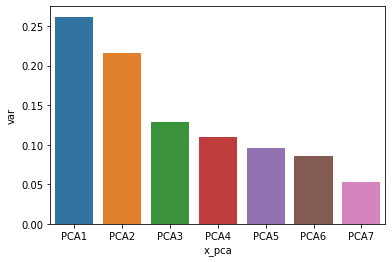

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features = df.iloc[:,0:8].values # independent variables
y = df.iloc[:,8:9].values # dependent variable

#Standardizing my data
x = StandardScaler().fit_transform(features)

#pca = PCA(.95) #instead of reducing it by number of components, I can elect to keep 95% of variance
pca = PCA(n_components = 7) # however if I select the above we get 99% variance

x_pca = pca.fit_transform(x)

pca.explained_variance_ratio_ #variance of the two components that resulted in at least 95% of variance kept
print("Sum of our principal components",pca.explained_variance_ratio_ .sum())

# Concat outcome with new reduced PCA components
target = df.iloc[:,8:9]
pca_df = pd.DataFrame(data=x_pca, columns =["PCA1", "PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"])
new_df = pd.concat([pca_df, target], axis = 1)
new_df.head(5)

# Plotting the PCA components
df1 = pd.DataFrame({"var": pca.explained_variance_ratio_, "x_pca":["PCA1", "PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"]})
sns.barplot(x= "x_pca", y = "var", data= df1)
plt.show()

# 7 is the right number of components to reduce our data to as I summed the variance for each principal component
# and we get a total of around 95%. 

## KMeans
Do clustering using KMeans on the original dataset (not the PCA) using K=2. Calculate Homogonity and Completeness score. Is that a good clustering?

In [5]:
from sklearn.cluster import KMeans 
from sklearn import metrics

df.head(5); df.tail(5)
x1 = df.drop("Outcome", axis = 1) #features 
y = df["Outcome"] #target

kmeans_model = KMeans(n_clusters = 2).fit(x1)

y_pred = kmeans_model.predict(x)

metrics.homogeneity_score(labels_true = y, labels_pred = y_pred)
#metrics.completeness_score(labels_pred = y_pred, labels_true = y)
metrics.completeness_score(labels_pred = y_pred, labels_true = y)
'''
  No, it is not good clustering as the scores for both homogeneity and completeness are really low, 
which means that our data was not clustered correctly as it contains data that should not go into
that specific cluster.If we had effective/efficient clustering then our homogeneity and completeness score would be close to 1. 
'''

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


-5.149462054959605e-16

1.0

'\n  No, it is not good clustering as the scores for both homogeneity and completeness are really low, \nwhich means that our data was not clustered correctly as it contains data that should not go into\nthat specific cluster.If we had effective/efficient clustering then our homogeneity and completeness score would be close to 1. \n'

### Split the data
Split the original dataset (not the PCA) to have 30% test data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 66, test_size = 0.3)

### Logistic Regression
Using LR, what is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve

Training accuracy is 0.7635009310986964
Test accuracy 0.7835497835497836
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       160
           1       0.68      0.56      0.62        71

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.78      0.78      0.78       231

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       340
           1       0.72      0.58      0.64       197

    accuracy                           0.76       537
   macro avg       0.75      0.73      0.73       537
weighted avg       0.76      0.76      0.76       537



/Users/fjacobo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'ROC Curve')

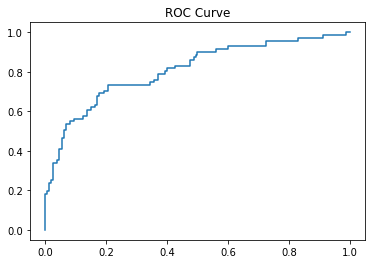

In [7]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

model=logreg.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
print("Training accuracy is", train_score)

test_score = model.score(X_test, y_test)
print("Test accuracy", test_score)

pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

print(classification_report(y_test, pred_test))
print(classification_report(y_train, pred_train))

# PLOT THE ROC CURVE
prob_test = logreg.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, prob_test[:,1])
plt.title("ROC Curve")
plt.plot(fpr, tpr)

Plot the test precision curve and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

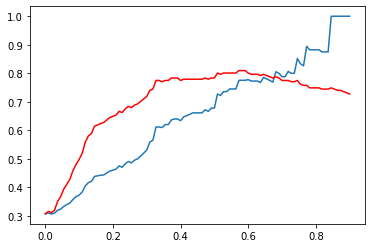

In [8]:
from sklearn import metrics 
import numpy as np 
threshold0 = np.linspace(0,0.9,100)
prec_list = []
acc_list = []

for th in threshold0:
    pred = prob_test[:,1] >= th 
    prec_list.append(metrics.precision_score (y_test, pred))
    acc_list.append(metrics.accuracy_score(y_test, pred))
plt.plot(threshold0, prec_list)
plt.plot(threshold0, acc_list, c ='r')

# Base on the plot below the model begins to overfit around 65%. 

## Deep Neural Networks
Using Keras, build a DNN that has better accuracy than LR. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve?

In [9]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import regularizers, layers, activations
from tensorflow.keras import models 
from sklearn.metrics import precision_recall_fscore_support, classification_report

scaler =  StandardScaler().fit(X_train)
x_scaled_train = scaler.transform(X_train)
x_scaled_test = scaler.transform(X_test)


model = models.Sequential()
model.add(layers.Dense(400, activation = "relu", input_dim = 8 ))
model.add(layers.Dense(250, kernel_regularizer = regularizers.l2(0.001), activation= 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(90, kernel_regularizer = regularizers.l2(0.001), activation= 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer=tf.keras.optimizers.Nadam(lr = 0.0000055), metrics= ["accuracy","Precision", "Recall"])

In [10]:
model.fit(x_scaled_train, y_train, epochs =200, batch_size = 15, validation_data = (x_scaled_test, y_test))

Epoch 1/200
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
36/36 [==============================] - 0s 10ms/step - loss: 1.1372 - accuracy: 0.4879 - precision: 0.3402 - recall: 0.4213 - val_loss: 1.1304 - val_accuracy: 0.5455 - val_precision: 0.3365 - val_recall: 0.4930
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 1.1335 - accuracy: 0.4935 - precision: 0.3333 - recall: 0.3807 - val_loss: 1.1250 - val_accuracy: 0.5801 - val_precision: 0.3617 - val_recall: 0.4789
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 1.1256 - accuracy: 0.5438 - precision: 0.3879 - recall: 0.4213 - val_loss: 1.1200 - val_accuracy: 0.6407 - val_precision: 0.4302 - val_recall: 0.5211
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 1.1269 - accuracy: 0.5717 - precision: 0.4118 - recall: 0.3909 - val_loss: 1.1147 - val_accuracy: 0.6883 - val_precision: 0.4930 - val_recall: 0.4930
Epoch 5/200
36/36 [=======

Test Data Metrics:
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       160
           1       0.68      0.61      0.64        71

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.79      0.79      0.79       231

Train Data Metrics:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       340
           1       0.74      0.64      0.69       197

    accuracy                           0.79       537
   macro avg       0.77      0.76      0.76       537
weighted avg       0.78     

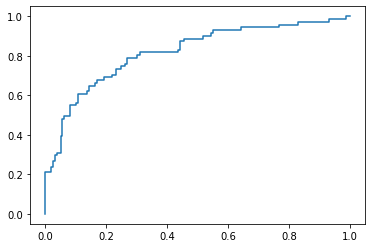

In [11]:
# What is the accuracy, precision and recall and F1 score for the training and the test data?
print("Test Data Metrics:")
pred_test1 = model.predict_classes(x_scaled_test)
print(classification_report(y_test,pred_test1))

print('Train Data Metrics:')
pred_train1 = model.predict_classes(x_scaled_train)
print(classification_report(y_train, pred_train1))

# ROC Curve
DNN_prob = model.predict_proba(x_scaled_test)
fpr, tpr, _ = metrics.roc_curve(y_test, DNN_prob[:,:1])
plt.plot(fpr, tpr)

plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

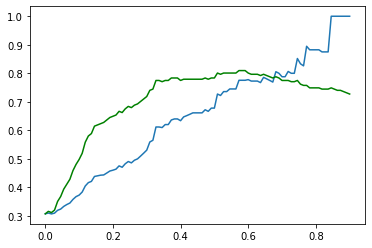

In [12]:
# PLOTTING THE PRECISION CURVE AND ACCURACY CURVE
from sklearn import metrics
import numpy as np
thresholds = np.linspace(0, 0.9, 100)
precision_list  = []
accuracy_list = []

for th in thresholds:
    pred1 = prob_test[:,1] >= th
    precision_list.append(metrics.precision_score(y_test, pred1))
    accuracy_list.append(metrics.accuracy_score(y_test, pred1))
plt.plot(thresholds, precision_list)
plt.plot(thresholds, accuracy_list, c = 'g')

# At around 70% the model begins to overfit.

## Random Forest
Build a random forest with `n_estimators=100`. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve? Is the model overfitting

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       160
           1       0.60      0.58      0.59        71

    accuracy                           0.75       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      0.99      1.00       197

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



Text(0.5, 1.0, 'ROC Curve')

0.8168133802816901

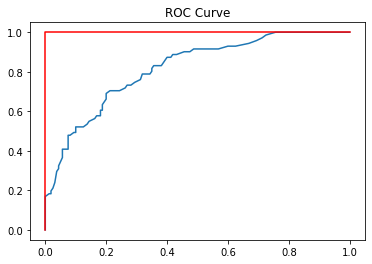

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report

# CREATING RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

rfc_pred_test = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred_test))

rfc_pred_train = rfc.predict(X_train)
print(classification_report(y_train, rfc_pred_train))

rfc_proba= rfc.predict_proba(X_test)
rfc_proba_trian = rfc.predict_proba(X_train)

#plot the ROC curve Test 
fpr, tpr, _ = metrics.roc_curve(y_test, rfc_proba[:,1])
plt.plot(fpr, tpr)
plt.title("ROC Curve")

fpr2, tpr2, _ = metrics.roc_curve(y_train, rfc_proba_trian[:,1])
plt.plot(fpr2, tpr2, color = "r")

metrics.auc(fpr, tpr)

# Yes, our model is overfitting but it is not overfitting by too much. Our AUC is 80.02%. 

build another model to limit the overfitting problem by using `n_estimators=1000, max_depth=8` as your random forest parameters. Is the overfitting better now?

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       160
           1       0.62      0.55      0.58        71

    accuracy                           0.76       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       340
           1       0.98      0.96      0.97       197

    accuracy                           0.98       537
   macro avg       0.98      0.98      0.98       537
weighted avg       0.98      0.98      0.98       537



0.9985368766796059

'\nThe model is better with a max depth of 8 as the area under the curve very close to 1 meaning that it is a better \noverall model than then one we had before with smaller forest and no depth.\n'

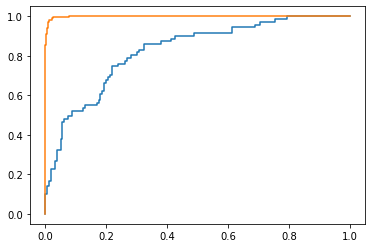

In [14]:
rfc1 = RandomForestClassifier(n_estimators = 1000, max_depth = 8)
rfc1.fit(X_train,y_train)

rfc_pred_test1 = rfc1.predict(X_test)
print(classification_report(y_test, rfc_pred_test1))

rfc_pred_train2 = rfc1.predict(X_train)
print(classification_report(y_train, rfc_pred_train2))

rfc1_proba =rfc1.predict_proba(X_test)
rfc1_proba_train =rfc1.predict_proba(X_train)

# Plotting the ROC Curve
fpr1, tpr1, _ = metrics.roc_curve(y_test, rfc1_proba[:,1])
plt.plot(fpr1, tpr1)

fpr1, tpr1, _ = metrics.roc_curve(y_train, rfc1_proba_train[:,1])
plt.plot(fpr1, tpr1)

#AUC                            
metrics.auc(fpr1, tpr1)

'''
The model is better with a max depth of 8 as the area under the curve very close to 1 meaning that it is a better 
overall model than then one we had before with smaller forest and no depth.
'''

plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

/Users/fjacobo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


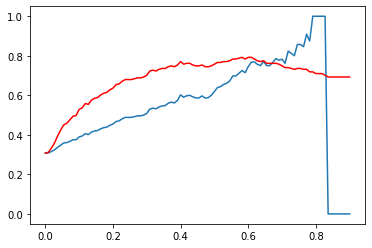

In [15]:
thresh = np.linspace(0, 0.9, 100)
precision_list1 = []
accuracy_list1 = []

for th in thresh:
    pred3 = rfc1_proba[:,1] >= th 
    precision_list1.append(metrics.precision_score(y_test, pred3))
    accuracy_list1.append(metrics.accuracy_score(y_test, pred3))
plt.plot(thresh, precision_list1)
plt.plot(thresh, accuracy_list1, c = "red")

# Finally: 
- Write a few lines about each of the three models and if there is one superior model and why do you think so?

In [16]:
'''0.79
The 3 models are effective, however, the forest model with a 1000 trees and a depth of 8 gives us the best model. 
We begin with an accuracy of 76% with the logistic regression model. 
The deep neural network model gives us an accuracy of 80% which is better than the logistic regression model.
First random forest give us an area under the curve of around 80%, however, the second forest we created had an 
area under the curve of 99%. Since we have a higher area under the curve in the second forest that is a better 
more effective model. 
'''

'0.79\nThe 3 models are effective, however, the forest model with a 1000 trees and a depth of 8 gives us the best model. \nWe begin with an accuracy of 76% with the logistic regression model. \nThe deep neural network model gives us an accuracy of 80% which is better than the logistic regression model.\nFirst random forest give us an area under the curve of around 80%, however, the second forest we created had an \narea under the curve of 99%. Since we have a higher area under the curve in the second forest that is a better \nmore effective model. \n'